# Data input

In general data can be acquired as:
* downloadable files (e.g. CSV, txt, Excel, JSON files and other common data formats)
* through API (Application Program Interface)
* through databases 

In this lab we will provide examples how to work with downloadable data in the two most common formats:
* comma-separated-values (CSV) or text files (txt) more generally 
* and Excel or XLS files

Also as urban analytics is often inherently spatial we'll consider another specific format often used for the spatial data: JSON

We will also provide some basic descriptive analytics, like getting the number of records, defining timeframes or summing up numeric columns.

It is always a good idea to start data analytics with such descriptive analysis as not only it gives an idea of the scale (and thus utility) of the data, but also allows to spot possible issues

In [53]:
import pandas as pd #first we'll need module pandas to work with the dataframes
%matplotlib inline

## Example 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue and many other details

Source https://data.boston.gov/dataset/311-service-requests

In [2]:
#lets specify the file location on the web
#we can actually upload the data directly from there!
#the data is provided by year, so consider the most recent full year available - 2019
fname = '311_service_requests_2020.csv'
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpxbo51van.csv'
# alternative url
url = 'https://media.githubusercontent.com/media/CUSP2020PUI/Data/master/311_service_requests_2020.csv'

In [3]:
boston311 = pd.read_csv(url) #upload the data

In [4]:
#preview the data
boston311.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101003156172,2020-01-10 11:32:00,2020-05-09 11:32:13,NaN,OVERDUE,Open,,Unsatisfactory Living Conditions,Inspectional Services,Housing,...,B3,Dorchester,9,14,1411,2 Osprey Way,2124.0,42.2925,-71.0939,Constituent Call
1,101003171366,2020-01-16 12:08:00,2021-01-15 12:09:19,NaN,ONTIME,Open,,New Tree Requests,Parks & Recreation Department,Trees,...,E18,Hyde Park,10,Ward 18,1822,141 Sherrin St,2136.0,42.2668,-71.1256,Employee Generated
2,101003175987,2020-01-22 15:34:00,2020-01-23 15:34:03,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,...,D4,Boston,6,04,0402,155 Dartmouth St,2116.0,42.3476,-71.0757,Citizens Connect App
3,101003180345,2020-01-27 21:33:00,2020-02-11 08:30:00,NaN,OVERDUE,Open,,PRINTED :,Public Works Department,Street Lights,...,A15,Charlestown,2,02,0202,45 First Ave,2129.0,42.3762,-71.0529,Citizens Connect App
4,101003183226,2020-01-30 14:55:58,2020-04-29 14:55:59,NaN,OVERDUE,Open,,Rental Unit Delivery Conditions,Inspectional Services,Housing,...,A7,East Boston,1,Ward 1,0104,117 Havre St,2128.0,42.3728,-71.0383,Constituent Call


In [5]:
#get the list of columns
boston311.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source'],
      dtype='object')

In [6]:
#get the total number of records
len(boston311)

161717

In [7]:
#summary statistics for all the numeric columns
boston311.describe()

,case_enquiry_id,location_zipcode,latitude,longitude
count,1.617170e+05,126496.000000,161717.000000,161717.000000
mean,1.010033e+11,2126.907041,42.331518,-71.078489
std,7.906295e+04,17.751533,0.034112,0.033925
min,1.010031e+11,2108.000000,42.231500,-71.185400
25%,1.010032e+11,2119.000000,42.306100,-71.094500
50%,1.010033e+11,2126.000000,42.340600,-71.067100
75%,1.010033e+11,2130.000000,42.359400,-71.058700
max,1.010034e+11,2467.000000,42.395200,-70.995100


Gives a good idea of how many records have a valid number defined and also averages and ranges for latitute/logitude

statistics for zipcode and id won't make that much sense 

as while these data has numeric type its categorical in nature and computing averages is somewhat meaningless

Some additional descriptive analysis one might be interested is to learn more about the categorical variables, e.g. subject, reason, type, neighborhood, zip_code

In [8]:
#first let's get the list of unique values for each, or at least the number of such values

In [9]:
boston311.subject.unique()

array(['Inspectional Services', 'Parks & Recreation Department',
       'Public Works Department', 'Property Management',
       "Mayor's 24 Hour Hotline", 'Transportation - Traffic Division',
       'Animal Control', 'Boston Water & Sewer Commission',
       'Boston Police Department', 'Consumer Affairs & Licensing',
       'Neighborhood Services'], dtype=object)

In [10]:
len(boston311.subject.unique())

11

In [11]:
len(boston311.reason.unique())

43

In [12]:
len(boston311.type.unique())

171

And if e.g. we want to know the number of complaints per subject we can group the dataframe as following

In [13]:
boston311['subject'].value_counts()

Public Works Department              85739
Transportation - Traffic Division    33328
Inspectional Services                14022
Mayor's 24 Hour Hotline              12207
Parks & Recreation Department        10935
Animal Control                        2196
Property Management                   2170
Boston Water & Sewer Commission        748
Boston Police Department               344
Consumer Affairs & Licensing            18
Neighborhood Services                   10
Name: subject, dtype: int64

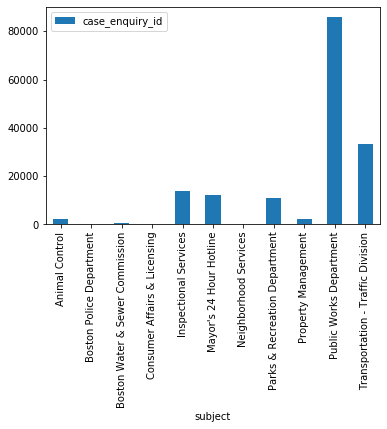

In [16]:
#or visualizing as a histogram
boston311[['subject','case_enquiry_id']].groupby(by=['subject']).count().plot.bar()

### Task 1. Count the number of neighborhoods and visualize the number of complaints by neighborhood

In [5]:
# your code here
!pip install pandas

In [6]:
import pandas as pd

In [8]:
!pip install matplotlib

In [9]:
%matplotlib inline

In [10]:
fname = '311_service_requests_2020.csv'
url = 'https://media.githubusercontent.com/media/CUSP2020PUI/Data/master/311_service_requests_2020.csv'

In [11]:
boston311 = pd.read_csv(url)

In [12]:
boston311.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101003156172,2020-01-10 11:32:00,2020-05-09 11:32:13,NaN,OVERDUE,Open,,Unsatisfactory Living Conditions,Inspectional Services,Housing,...,B3,Dorchester,9,14,1411,2 Osprey Way,2124.0,42.2925,-71.0939,Constituent Call
1,101003171366,2020-01-16 12:08:00,2021-01-15 12:09:19,NaN,ONTIME,Open,,New Tree Requests,Parks & Recreation Department,Trees,...,E18,Hyde Park,10,Ward 18,1822,141 Sherrin St,2136.0,42.2668,-71.1256,Employee Generated
2,101003175987,2020-01-22 15:34:00,2020-01-23 15:34:03,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,...,D4,Boston,6,04,0402,155 Dartmouth St,2116.0,42.3476,-71.0757,Citizens Connect App
3,101003180345,2020-01-27 21:33:00,2020-02-11 08:30:00,NaN,OVERDUE,Open,,PRINTED :,Public Works Department,Street Lights,...,A15,Charlestown,2,02,0202,45 First Ave,2129.0,42.3762,-71.0529,Citizens Connect App
4,101003183226,2020-01-30 14:55:58,2020-04-29 14:55:59,NaN,OVERDUE,Open,,Rental Unit Delivery Conditions,Inspectional Services,Housing,...,A7,East Boston,1,Ward 1,0104,117 Havre St,2128.0,42.3728,-71.0383,Constituent Call


In [13]:
boston311['neighborhood'].value_counts()

Dorchester                                      25580
Roxbury                                         15391
South Boston / South Boston Waterfront          12302
Allston / Brighton                              11564
East Boston                                     10938
South End                                       10814
Hyde Park                                        9127
Jamaica Plain                                    8922
Downtown / Financial District                    8140
Greater Mattapan                                 7296
Back Bay                                         7113
West Roxbury                                     5857
Roslindale                                       5688
Charlestown                                      5402
Boston                                           4224
Beacon Hill                                      3272
Fenway / Kenmore / Audubon Circle / Longwood     2750
Mission Hill                                     2555
                            

<AxesSubplot:xlabel='neighborhood'>

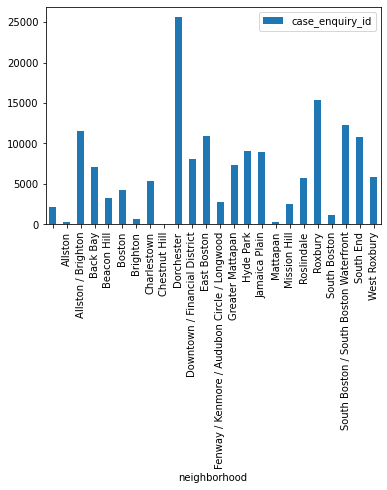

In [14]:
boston311[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().plot.bar()

## Example 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, its size, age, time of sale and of course the price

In [57]:
#the data is split by year and borough. Take Brooklyn in 2015 
year=2015; boro='brooklyn'

In [58]:
fname=str(year)+'_'+boro+'.xls'

In [59]:
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname
# alternative URL
url = 'https://github.com/CUSP2020PUI/Data/blob/master/'+fname+'?raw=true'

In [60]:
re_sales = pd.read_excel(url)

In [61]:
re_sales.head()

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


We'll need to skip first 4 lines to make it pandas-frienly 

And also consider alternative data ingestion approach: download to the local folder first and then upload from local drive

In [62]:
import urllib #use urllib mobule for web requests
dataDir='' #local data folder to use
urllib.request.urlretrieve(url,dataDir+fname)

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x28484e75a08>)

In [27]:
#now upload the data, also skipping first 4 rows
re_sales = pd.read_excel(dataDir+fname,skiprows=4)

In [28]:
re_sales.head() #now the dataframe looks reasonable

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [29]:
re_sales.columns #list of the columns to assess the metadata

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [30]:
#notice that field names contain an artifact from the original data represenation - end of line symbol '\n'
#this way we won't be able to access the fields as before using "." syntax, but we can still use "[]" syntax like

In [31]:
re_sales['SALE PRICE\n'].sum() #this will be the total sales volume

19990077327

In [32]:
re_sales.describe() #statistics for numeric columns

,BOROUGH\n,BLOCK\n,LOT\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,SALE PRICE\n
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08


It also helps us spot some issues with the data - zero min's for zip code, size, year (also average age of 1774 does not look right and is likely affected by that), sale price show that some records are unreliable

Also lets introduce some descriptive analysis, e.g. total price and average price per unit

In [33]:
re_sales['SALE PRICE\n'].mean() #average price per unit

788190.100425834

In [34]:
#or visualizing an average sale price per zip code 
#ideally this would make more sense as a spatial visualization on the map. but let us get to that later
#we'll use groupby here. Note that groupby will apply mean to all the fields other than the ones used for grouping (by)
#so we first filter the datarame to keep only two columns - 'ZIP CODE\n','SALE PRICE\n' - first for grouping, second for taking averages
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean()

,SALE PRICE\n
ZIP CODE,
0,4.892857e+05
11201,1.618065e+06
11203,4.190376e+05
11204,4.908219e+05
11205,7.062129e+05
11206,1.213060e+06
11207,4.006299e+05
11208,3.979557e+05
11209,5.333751e+05


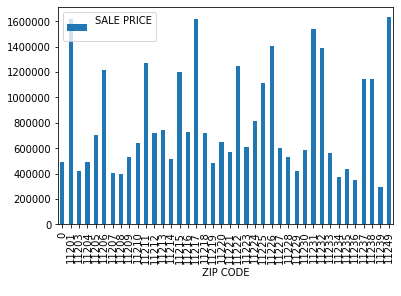

In [35]:
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean().plot.bar()

But price per unit is not always the best characteristics of the market as units might be quite different, ranging from small studios to large houses. Besides particularly expensive ones may affect the averages. Median price is often used along with the price per square foot. In the next excercise, we'll try to compute an average price per square foot. For now let's skip the technical issue like missing/zero data and just plow ahead. In the next lab we'll talk about how those should addressed.

### Task 2. 
Quantify the average price per square foot per zip code. Visualize result as a bar plot. Which zip codes are the three most expensive ones?

Hints: First, use "group_by" to create an aggregate with cumulative price and sq foot size and then add a new field through assignment dividing one by the other. 

You can use sort_values to order dataframe by price per zip code and see the top three zip codes.

Not mandatory, but if you want python to give you a specific list of the top three zip codes, you can use .iloc to slice it and get the index converting it to a list. But then make sure to ignore zip codes with infinite prices (likely due to zero house sizes).

In [15]:
# your code here

In [63]:
!pip install xlrd

In [64]:
year=2015; boro='brooklyn'

In [65]:
fname=str(year)+'_'+boro+'.xls'

In [66]:
url = 'https://github.com/CUSP2020PUI/Data/blob/master/'+fname+'?raw=true'

In [67]:
re_sales = pd.read_excel(url)

In [68]:
re_sales.head()

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


In [69]:
import urllib
dataDir=''
urllib.request.urlretrieve(url,dataDir+fname)

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x284857e1348>)

In [70]:
re_sales = pd.read_excel(dataDir+fname,skiprows=4)

In [71]:
re_sales.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [72]:
re_sales.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [73]:
re_sales.columns = [n[:-1] for n in re_sales.columns]

In [74]:
re_sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08


In [75]:
re_sales['SALE PRICE'].sum()

19990077327

In [76]:
re_sales['SALE PRICE'][re_sales['SALE PRICE']>0].mean()

1236091.8455973286

          SALE PRICE  LAND SQUARE FEET  price per square
ZIP CODE                                                
11215      798971259       2445.388489     326725.697175
11221      576831991       2134.617785     270227.295552
11201      973741474       3807.363636     255752.160025


<AxesSubplot:xlabel='ZIP CODE'>

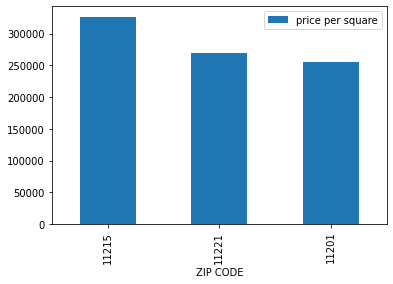

In [78]:
import numpy as np

df=re_sales[['ZIP CODE','SALE PRICE','LAND SQUARE FEET']]

df=df[(df['LAND SQUARE FEET']!=0) & (df['SALE PRICE']!=0)]


df=df.groupby(by=['ZIP CODE']).agg({'SALE PRICE': np.sum, 'LAND SQUARE FEET': np.mean})


df['price per square']=df['SALE PRICE']/df['LAND SQUARE FEET']

df=df.sort_values(by='price per square',ascending=False)
df=df[:3]
print(df)
df.plot(y='price per square',kind='bar')

## Example 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.

GeoJSON is a JSON based format designed to represent the geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As JSON contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module geopandas which we'll use below. In short its just like pandas, but having a special column "geometry" which is meant to contain spatial info

In [42]:
import geopandas as gpd
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
# alternative URL
url = 'https://github.com/CUSP2020PUI/Data/raw/master/Street%20Pavement%20Rating.geojson'
rating = gpd.read_file(url)

In [43]:
rating.shape #shape of the dataframe - first is the number of records (streets)

(81209, 13)

In [44]:
rating.head() #lets preview the data

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,56,249.903981561,0,0,None,0,414,30,NR,None,"MULTILINESTRING ((-74.24916 40.49872, -74.2500..."
1,0,0,58,260.837113924,0,0,None,0,425,30,NR,None,"MULTILINESTRING ((-74.24935 40.49944, -74.2502..."
2,0,0,73,250.888421415,0,6,None,2019,202,30,FAIR,2019-03-12T00:00:00,"MULTILINESTRING ((-74.25058 40.50588, -74.2514..."
3,0,0,106,231.814581077,0,9,None,2019,232,30,GOOD,2019-03-12T00:00:00,"MULTILINESTRING ((-74.25140 40.51174, -74.2520..."
4,0,0,123,276.441675585,0,8,None,2013,212,30,GOOD,2013-06-19T00:00:00,"MULTILINESTRING ((-74.25171 40.51409, -74.2511..."


In [45]:
rating.iloc[:,:-1].describe() #note that we can't apply describe to a geometry column so need to exclude it first

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date
count,81209,81209,81209,81209,81209,81209,57698,81209,81209,81209,81209,72989
unique,2,2,81209,41590,2,11,3,30,1588,834,4,1914
top,0,0,31097,260.499520153,0,8,L,2020,246,30,GOOD,2019-11-25T00:00:00
freq,71660,68374,1,359,73352,25137,40816,33748,846,26402,47178,484


In [ ]:
#Notice that this time describe look differently. This is because the values in the dataframe are not treated as numbers but categorical values

In [47]:
#if we want them as numbers we need to perform type convertion
rating['length'] = rating['length'].astype(int)
rating['length'].describe()

count    81209.000000
mean       382.526321
std        250.159451
min          6.000000
25%        238.000000
50%        288.000000
75%        505.000000
max       6795.000000
Name: length, dtype: float64

In [48]:
#now let's count how many streets are in either condition based on 'rating_word'
rating['rating_word'].value_counts()

GOOD    47178
FAIR    24732
NR       8220
POOR     1079
Name: rating_word, dtype: int64

In [49]:
#now let's count the cumulative length of those in either condition based on 'rating_word'
rating[['rating_word','length']].groupby(by=['rating_word']).sum()

,length
rating_word,
FAIR,9291301
GOOD,18521671
NR,2824328
POOR,427280


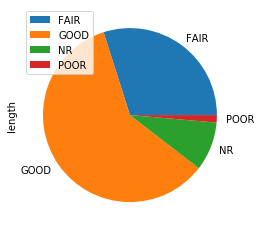

In [50]:
#and visualize overall conditions of the roads using piechart
rating[['rating_word','length']].groupby(by=['rating_word']).sum().plot.pie(y='length')

And let's use the true power of geopandas - visualize the streetmap

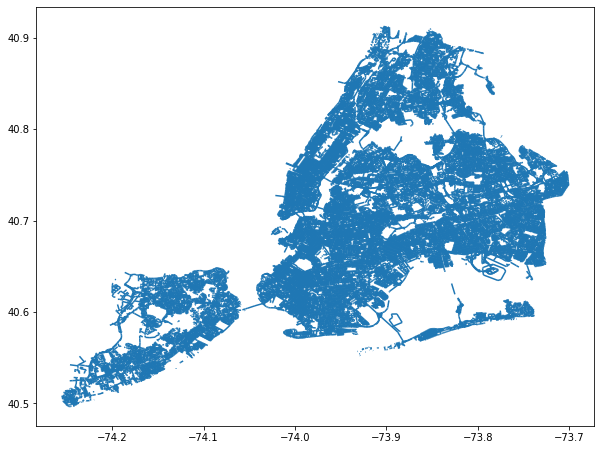

In [51]:
rating.plot(column=None, figsize=(10,10)) #first just the shapes of the streetmap without any information

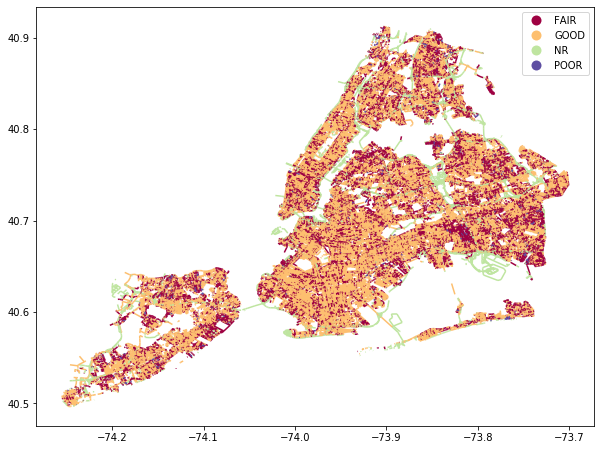

In [52]:
#and now visualize the streets according to their status 
rating.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Task 3.
Visualize only the poorly maintained roads so we can zoom into those that need particular attention.

HINT: Filter the dataframe first using slicing by an appropriate condition on rating.rating_word

In [79]:
import geopandas as gpd

In [80]:
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'

In [81]:
rating = gpd.read_file(url)

In [4]:
rating.shape

(81209, 13)

In [5]:
rating.head()

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,13,932.40173745,0,0,None,0,933,30,NR,None,"MULTILINESTRING ((-74.25272 40.50252, -74.2507..."
1,0,0,31,426.919196102,0,8,L,2019,205,35.67,GOOD,2019-03-12T00:00:00,"MULTILINESTRING ((-74.25300 40.50688, -74.2545..."
2,1,0,32,291.756747994,1,7,P,2019,295,30.92,FAIR,2019-04-04T00:00:00,"MULTILINESTRING ((-74.25288 40.50763, -74.2539..."
3,0,0,33,273.250800548,0,8,L,2019,229,33.58,GOOD,2019-03-12T00:00:00,"MULTILINESTRING ((-74.25288 40.50763, -74.2530..."
4,0,0,48,428.590713852,0,0,None,0,221,30,NR,None,"MULTILINESTRING ((-74.25138 40.50011, -74.2502..."


In [6]:
rating.iloc[:,:-1].describe()

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date
count,81209,81209,81209,81209,81209,81209,57698,81209,81209,81209,81209,72997
unique,2,2,81209,41590,2,11,3,30,1588,834,4,1920
top,0,0,19946,260.499520153,0,8,L,2020,246,30,GOOD,2019-11-25T00:00:00
freq,71660,68374,1,359,73352,25148,40816,33125,846,26402,47510,481


In [7]:
rating['length'] = rating['length'].astype(int)
rating['length'].describe()

count    81209.000000
mean       382.526321
std        250.159451
min          6.000000
25%        238.000000
50%        288.000000
75%        505.000000
max       6795.000000
Name: length, dtype: float64

In [14]:
rating['rating_word'].value_counts()

GOOD    47510
FAIR    24390
NR       8212
POOR     1097
Name: rating_word, dtype: int64

In [ ]:
rating=pd.DataFrame(np.arange(20).reshape(5,4),index=list('abcde'),columns=list('ABCD'))

In [16]:
rating[['rating_word','length']].groupby(by=['rating_word']).sum()

,length
rating_word,
FAIR,9152636
GOOD,18663126
NR,2821108
POOR,427710


<AxesSubplot:ylabel='length'>

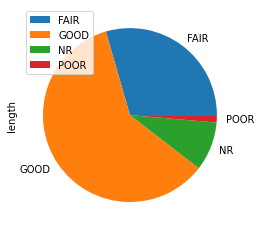

In [10]:
rating[['rating_word','length']].groupby(by=['rating_word']).sum().plot.pie(y='length')

<AxesSubplot:>

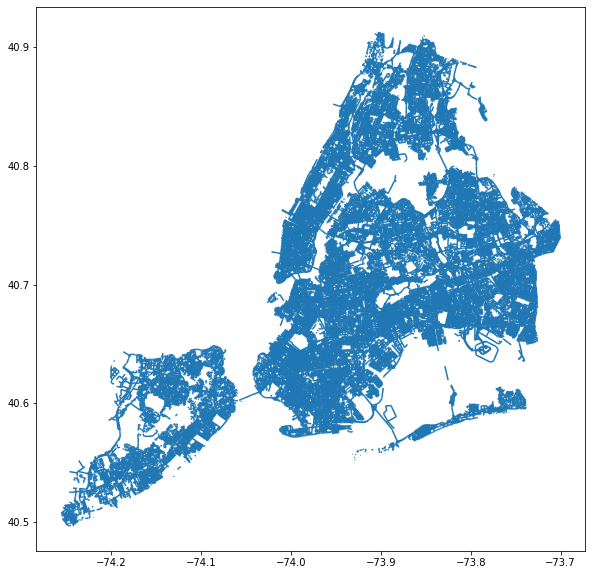

In [83]:
rating.plot(column=None, figsize=(10,10)) 

<AxesSubplot:>

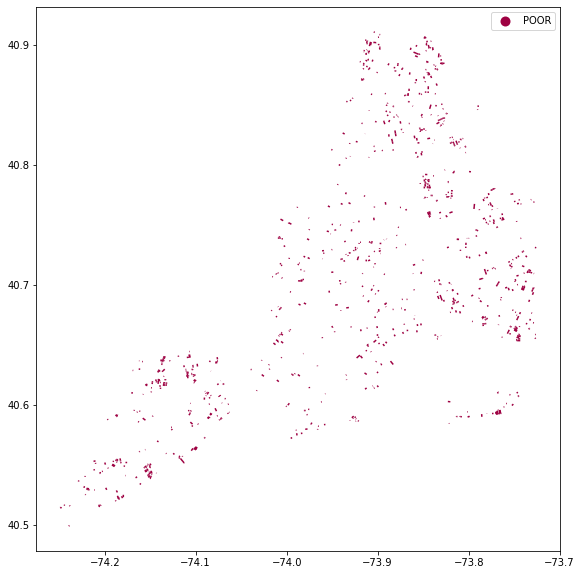

In [85]:
rating2=rating[rating['rating_word'] == 'POOR']
rating2.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Task 4. COVID-19 Data by ZIP Code

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

Task: 
    
    a) Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
    
    b) Calculate borough-wise positive case percentage among all the tests administered and 
    
    c) among the borough population (%% of populating tested positive), and then visualize as barplots. 
    
    Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent among boroughs.


Hint: The column for case amount is “COVID_CASE_COUNT". Try groupby function in pandas to get total cases and tests by borough. Positive case percentage is ‘100*COVID_CASE_COUNT'/'TOTAL_COVID_TESTS'. To calculate positive case percentage, you might first need a borough level dataframe.

In [54]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
# alternative url
#url = 'https://raw.githubusercontent.com/CUSP2020PUI/Data/master/COVID19.csv'
df = pd.read_csv(url)

<AxesSubplot:xlabel='BOROUGH_GROUP'>

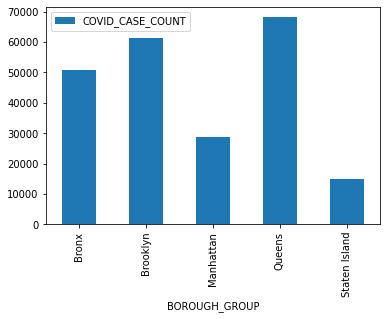

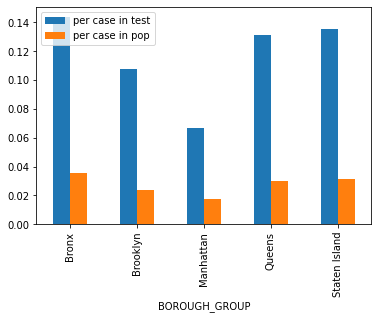

In [55]:
# your code here

#a)
df1=df[['BOROUGH_GROUP','COVID_CASE_COUNT']].groupby('BOROUGH_GROUP').sum()
df1.plot.bar()

#b) c)

df2=df[['BOROUGH_GROUP','COVID_CASE_COUNT','TOTAL_COVID_TESTS','POP_DENOMINATOR']].groupby('BOROUGH_GROUP').sum()
df2['per case in test']=df2['COVID_CASE_COUNT']/df2['TOTAL_COVID_TESTS']
df2['per case in pop']=df2['COVID_CASE_COUNT']/df2['POP_DENOMINATOR']
df2.plot.bar(y=['per case in test','per case in pop'])